**Relevant reading for this problem set**:
<a href="https://moderndive.com/9-hypothesis-testing.html"
target="_blank">ModernDive Chapter 9: Hypothesis Testing</a>.

First load the necessary packages:

In [1]:
library('tidyverse')
library('infer')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


For this Problem Set you will work with some grade-point-average (GPA)
data for college freshman. The following will read in the data:

In [2]:
sat_gpa = read_csv("https://rudeboybert.github.io/SDS220/static/PS/sat_gpa.csv", col_types = cols(), col_select = c(-1))

colnames(sat_gpa)

sat_gpa |> glimpse()

New names:
• `` -> `...1`


[1] "sex"        "sat_verbal" "sat_math"   "sat_total"  "gpa_hs"    
[6] "gpa_fy"

Rows: 1,000
Columns: 6
$ sex        <chr> "Male", "Female", "Female", "Male", "Male", "Female", "Male…
$ sat_verbal <dbl> 65, 58, 56, 42, 55, 55, 57, 53, 67, 41, 58, 45, 43, 50, 54,…
$ sat_math   <dbl> 62, 64, 60, 53, 52, 56, 65, 62, 77, 44, 70, 57, 45, 58, 66,…
$ sat_total  <dbl> 127, 122, 116, 95, 107, 111, 122, 115, 144, 85, 128, 102, 8…
$ gpa_hs     <chr> "high", "high", "high", "high", "high", "high", "low", "hig…
$ gpa_fy     <dbl> 3.18, 3.33, 3.25, 2.42, 2.63, 2.91, 2.83, 2.51, 3.82, 2.54,…


In [3]:
#cleaning colums name

sat_gpa <- sat_gpa %>%
  rename(
    sex = `sex`,
    sat_verbal = `sat_verbal`,
    sat_math = `sat_math`,
    sat_total = `sat_total`,
    gpa_hs = `gpa_hs`,
    gpa_fy = `gpa_fy`
  )


In [4]:
#checking the data type
str(sat_gpa)

#converting then to numeric

sat_gpa <- sat_gpa %>%
  mutate(
    gpa_hs = as.numeric(gpa_hs),
    gpa_fy = as.numeric(gpa_fy)
  )


tibble [1,000 × 6] (S3: tbl_df/tbl/data.frame)
 $ sex       : chr [1:1000] "Male" "Female" "Female" "Male" ...
 $ sat_verbal: num [1:1000] 65 58 56 42 55 55 57 53 67 41 ...
 $ sat_math  : num [1:1000] 62 64 60 53 52 56 65 62 77 44 ...
 $ sat_total : num [1:1000] 127 122 116 95 107 111 122 115 144 85 ...
 $ gpa_hs    : chr [1:1000] "high" "high" "high" "high" ...
 $ gpa_fy    : num [1:1000] 3.18 3.33 3.25 2.42 2.63 2.91 2.83 2.51 3.82 2.54 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_skip(),
  ..   sex = col_character(),
  ..   sat_verbal = col_double(),
  ..   sat_math = col_double(),
  ..   sat_total = col_double(),
  ..   gpa_hs = col_character(),
  ..   gpa_fy = col_double()
  .. )


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gpa_hs = as.numeric(gpa_hs)`.
Caused by warning:
! NAs introduced by coercion”


Each row or case in this data frame is a student. The data includes:

-   the (binary) gender of each student
-   the math, verbal and total SAT scores for each student
-   the GPA range of each student in high school (categorized as “low”
    or “high”)
-   the GPA of each student their first year of college on a numeric
    scale.

We will use hypothesis testing to answer the following questions:

1.  Is there a difference in male and female freshman GPAs?
2.  Is there a difference in total SAT score for students with a “low”
    and “high” high-school GPA?

Note, if you get stuck as you are working through this, it will be
helpful to review Chapter 9 in ModernDive.

## Question 1: Gender differences in first-year GPA?

For this question, let’s use a pre-determined $\alpha$
significance-level of 0.05.

## Q1.a)

Calculate the mean GPA score for each gender, using the `group_by` and
`summarize` commands from the `dplyr` package.

In [5]:
mean_gpa_by_sex <- sat_gpa |> 
  group_by(sex) |> 
  summarize(mean_gpa = mean(gpa_fy, na.rm = TRUE))

mean_gpa_by_sex


sex,mean_gpa
<chr>,<dbl>
Female,2.544587
Male,2.396066


**Questions**:

1.  What is the difference in sample mean GPA’s?
2.  Make a guess: is this difference statistically significant?

**Answers**:

1. -0.148520885386636 
2.  0.1485

In [6]:
# Question 1
mean_difference <- diff(mean_gpa_by_sex$mean_gpa)
mean_difference

[1] -0.1485209

In [7]:
#Question 2

t_test_result <-t.test(gpa_fy ~ sex, data = sat_gpa)
t_test_result
                       


	Welch Two Sample t-test

data:  gpa_fy by sex
t = 3.1768, df = 983.3, p-value = 0.001535
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 0.05677744 0.24026433
sample estimates:
mean in group Female   mean in group Male 
            2.544587             2.396066 


Question 2

This indicates that, on average, female students have a slightly higher GPA (by 0.1485) compared to male students.The p-value of 0.001535 is well below the significance level of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant difference in GPA between male and female students. The 95% confidence interval for the difference in means is 0.05677744 and 0.24026433. This interval does not include 0, which supports the conclusion that there is a significant difference. The analysis suggests a statistically significant difference in GPA between male and female freshmen, with female students showing a slightly higher mean GPA.


## Q1.b)

Generate a data visualization that displays the GPAs of the two groups.
Be sure to include a title and label your axes.

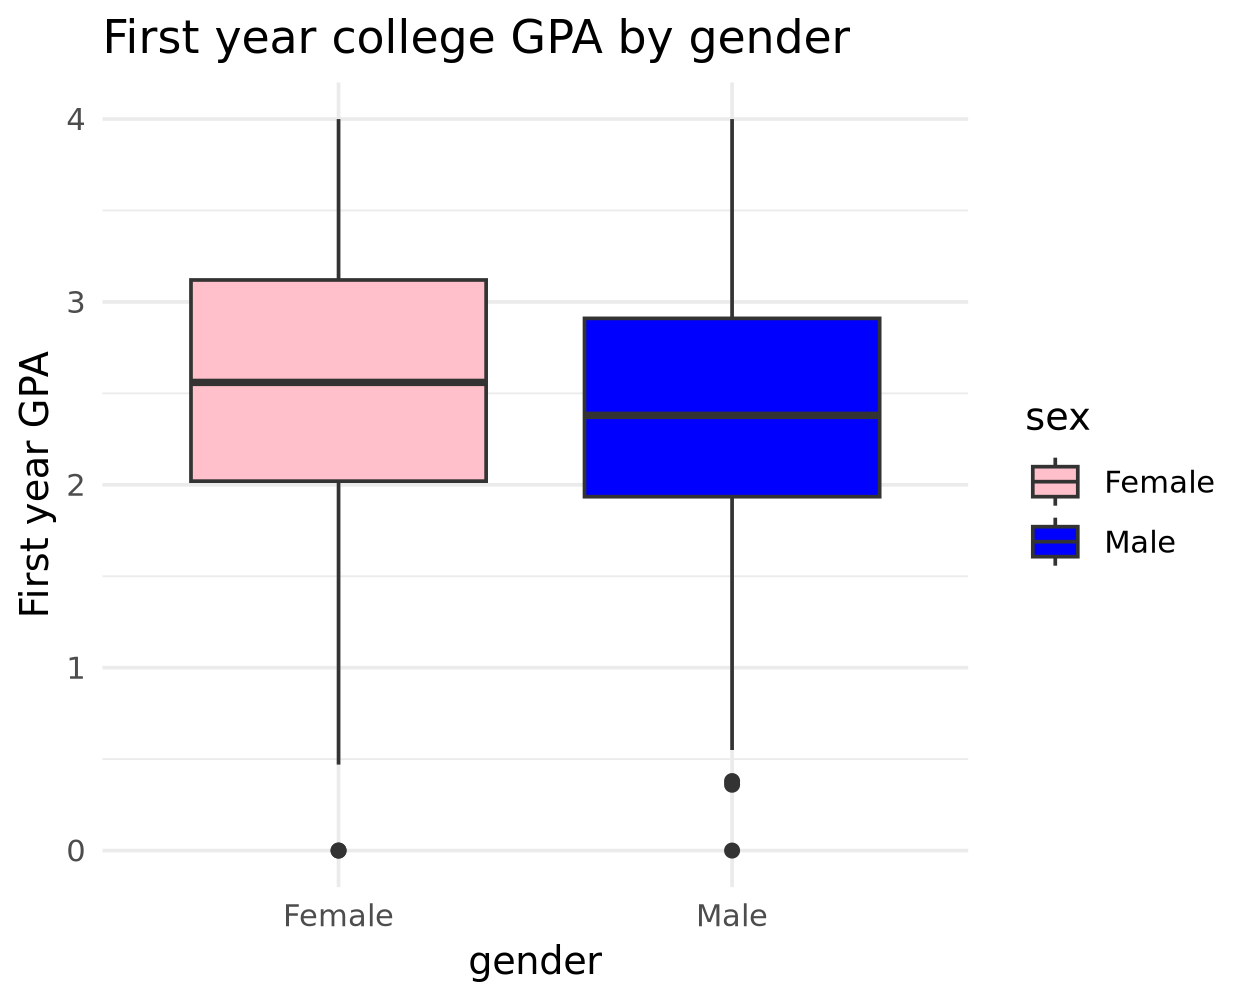

In [8]:

library(ggplot2)

ggplot(sat_gpa, aes(x= sex, y = gpa_fy, fill = sex)) +
    geom_boxplot() +
    labs (
        title = "First year college GPA by gender",
        x = "gender",
        y = "First year GPA") +
    scale_fill_manual(values = c("Female" = "pink", "Male" = "blue")) +
    theme_minimal()



## Stating a null hypothesis

We will now test the null hypothesis that there’s no difference in
population mean GPA between the genders at the population level. We can
write this out in mathematical notation

$$\begin{aligned} H_0:&\mu_{female} = \mu_{male} \\\ \mbox{vs }H_A:& \mu_{female} \neq \mu_{male} \end{aligned}$$

or expressed differently, that the difference is 0 or not:

$$\begin{aligned} H_0:&\mu_{female} - \mu_{male} = 0 \\\ \mbox{vs }H_A:& \mu_{female} - \mu_{male} \neq 0 \end{aligned}$$

## Testing the hypothesis

Here’s how we use the `infer` package to conduct this hypothesis test:

### Step 1: Calculate the observed difference

Note that the order we choose does not matter here (female then
male)…but since we used `order = c("Female", "Male")` here, we should do
the same in subsequent calculations!

In [9]:
obs_diff_gpa_sex = sat_gpa |>
  specify(gpa_fy ~ sex) |>
  calculate(stat = "diff in means", order = c("Female", "Male"))

obs_diff_gpa_sex

stat
<dbl>
0.1485209


Note that this is the difference in the group means we calculated
earlier!

In [15]:
2.544587 - 2.396066

[1] 0.148521

### Step 2. Generate the null distribution of $\delta$

This step involves generating simulated values *as if* we lived in a
world where there’s no difference between the two groups. Going back to
the idea of permutation, and tactile sampling, this is akin to shuffling
the GPA scores between male and female labels (i.e. removing the
structure to the data) just as we could have done with index cards.

In [10]:
gpas_in_null_world = sat_gpa |> 
  specify(gpa_fy ~ sex) |> 
  hypothesize(null = "independence") |>
  generate(reps = 5000, type = 'permute')

gpas_in_null_world |> head()

gpa_fy,sex,replicate
<dbl>,<fct>,<int>
3.37,Male,1
1.62,Female,1
2.15,Female,1
2.40,Male,1
3.19,Male,1
2.67,Female,1


## Q1.c)

**Question**:

1.  What was the size of the “shuffled” (permuted) sample in each run?
2.  How many times did we “shuffle” (permute) the sample? How many rows
    are in the `gpas_in_null_world` data frame?

**Answer:**

1.  1000
2.  5000000

In [11]:
# Question 1
nrow(sat_gpa)


[1] 1000

Question 1

The "shuffled" sample size refers to the number of observations included in each permutation. Since we are shuffling the labels (gender) in the sat_gpa dataset, the sample size for each permutation is equal to the original number of observations in sat_gpa.

In [12]:
# Question 2
nrow(gpas_in_null_world)

[1] 5000000

Question 2
Since each permutation has the same number of rows as the original dataset, 
the total number of rows in gpas_in_null_world is:
number of rows = (sample size) x (number of permutation)


### Step 3. Calculate the differences between male and females under the null

The following calculates the differences in mean GPA for males and
females for “shuffled” (permuted) data.

In [13]:
gpa_diff_under_null = gpas_in_null_world |>
  calculate(stat = "diff in means", order = c("Female", "Male")) 

gpa_diff_under_null |> 
  head()

replicate,stat
<int>,<dbl>
1,-0.05200445
2,-0.05580835
3,0.04993994
4,-0.04844080
5,0.02143075
6,-0.05140384


## Q1.d)

**Question**:

1.  How many rows are in this data frame? Why?

**Answer:**

1.  5000

In [14]:
nrow(gpa_diff_under_null)

[1] 5000

Answer:

Each row corresponds to a single permutation (or shuffle) where the GPA scores were randomly reassigned to either gender label, simulating a world where the difference in GPA between genders is zero. This approach generates a distribution of mean differences under the null hypothesis, allowing us to compare our observed difference against this null distribution to assess statistical significance.

### Step 4. Visualize how the observed difference compares to the null distribution of $\delta$

The following plots the $\delta$ values we calculated for each of the
different “shuffled” replicates. This is the null distribution of
$\delta$. The red line shows the observed difference between male and
female scores in the data (-0.1485209) from step 1.

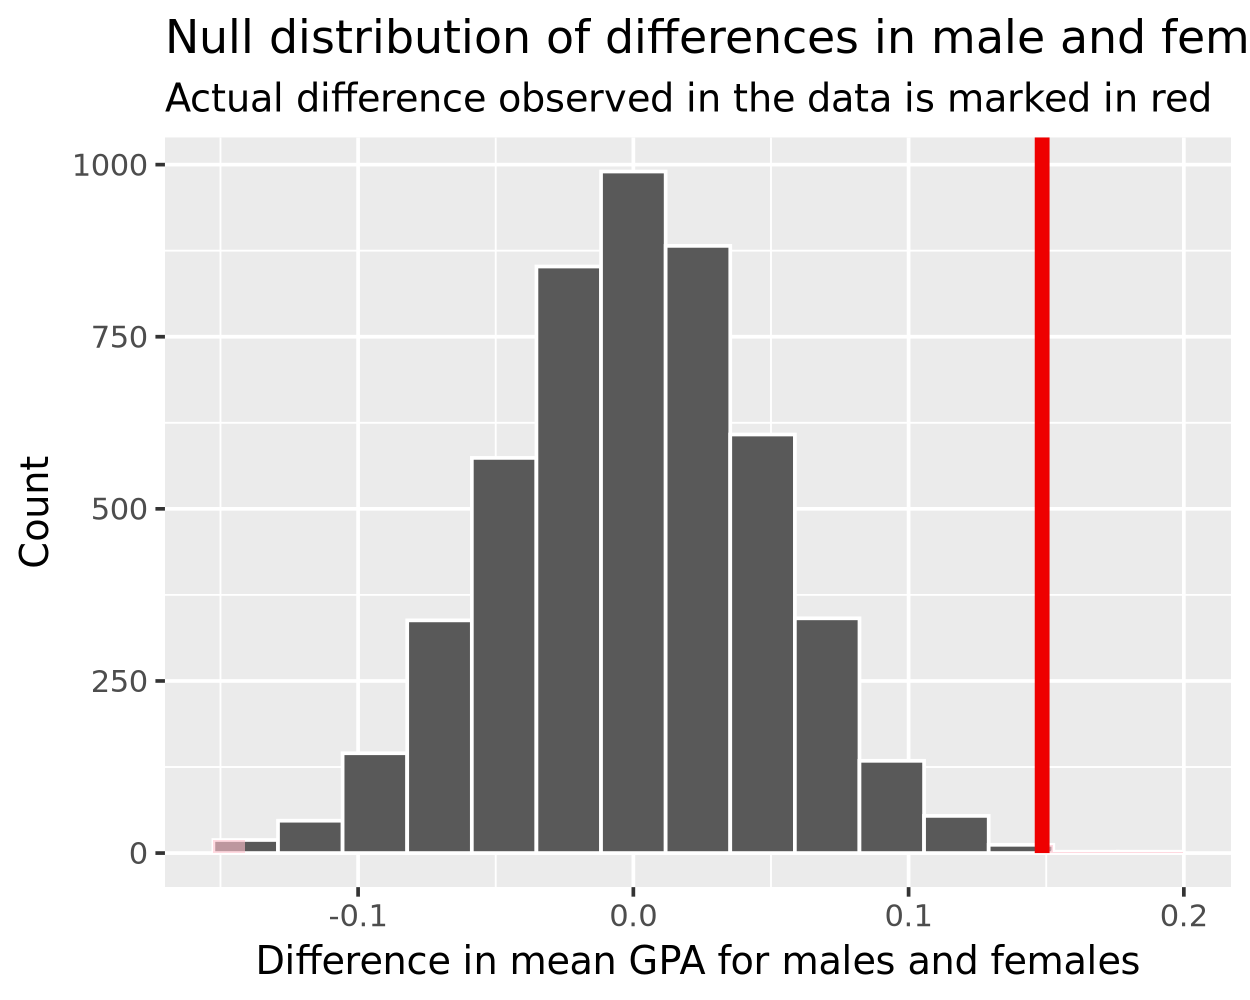

In [15]:
visualize(gpa_diff_under_null) +
  shade_p_value(obs_stat = obs_diff_gpa_sex, direction = "both") +
  labs(x = "Difference in mean GPA for males and females", y = "Count",
       title = "Null distribution of differences in male and female GPAs",
       subtitle = "Actual difference observed in the data is marked in red"
       )

**Note that zero is the center of this null distribution.** The null
hypothesis is that there is no difference between males and females in
GPA score. In the permutations, zero was the most common difference,
because observed GPA values were re-assigned to males and females **at
random**. Differences as large as \~ 0.1 and -0.1 occurred, but much
less frequently, because they are just not as likely when structure is
removed from the data.

### Step 5: Calculate a p-value

In [16]:
gpa_diff_under_null %>% 
  get_pvalue(obs_stat = obs_diff_gpa_sex, direction = "both") 

p_value
<dbl>
0.0024


This result indicates that there is a 0.1% chance (very low) chance that
we would see a difference of 0.15 in GPA scores between males and
females (or a bigger difference) if in fact there was truly no
difference between the sexes in GPA scores in the population.

## Q1.e)

Fill in the blanks below to write up the results & conclusions for this
test:

The mean GPA scores for females in our sample ($\bar{x}$ = 2.5446)
was greater than that of males ($\bar{x}$ = 2.3961). This
difference **(was/was not)**\_ statistically significant at
$\alpha = 0.05$, (p = 0.001535). Given this I **(would/would
not)** reject the Null hypothesis and conclude that females have
higher GPAs than males at the population level.



# while filling above, i have made mistakes because of the formate. Here i am writing answers only.

Female mean GPA = 2.5446
Male meas GPS = 2.3961
p = 0.001535
females and males


### Step 6: Calculate a confidence interval for the difference

The following will allow us to calculate a 95% confidence interval for
the difference between mean GPA scores for males and females.

In [17]:
ci_diff_gpa_means <- sat_gpa %>% 
  specify(gpa_fy ~ sex) %>%
  generate(reps = 5000, type = "bootstrap") %>% 
  calculate(stat = "diff in means", order = c("Female", "Male")) %>% 
  get_confidence_interval(level = 0.95)

ci_diff_gpa_means

lower_ci,upper_ci
<dbl>,<dbl>
0.0583116,0.2387604


## Complete all the above tasks with a t-test

Note that all the above steps can be done with one line of code **if a
slew of assumptions** like normality and equal variance of the groups
are met.

In [18]:
t.test(gpa_fy ~ sex, var.equal = TRUE, data = sat_gpa)


	Two Sample t-test

data:  gpa_fy by sex
t = 3.1828, df = 998, p-value = 0.001504
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 0.05695029 0.24009148
sample estimates:
mean in group Female   mean in group Male 
            2.544587             2.396066 


## Question 2: Relationship between high-school GPA category and Total SAT score?

For this analysis `sat_total` is the outcome variable, and `gpa_hs` is
the predictor variable, with two levels “low” and “high”. For this
question, let’s use a pre-determined $\alpha$ significance-level of
0.10, which is considered a more liberal significance-level than 0.05
since p-values will have an easier time being less than $\alpha$, and
thus we are likely to reject the null hypothesis $H_0$ more often.

## Exploratory data analysis

We can first calculate the mean total SAT score for each group (i.e
students with a low and high GPA), using the `group_by` and `summarize`
commands from the `dplyr` package.

In [34]:
avg_sat_gpa <- sat_gpa %>% 
  group_by(gpa_hs) %>% 
  summarize(sat_total = mean(sat_total))

avg_sat_gpa

gpa_hs,sat_total
<dbl>,<dbl>


We will next generate a data visualization that displays the total SAT
scores of the two groups. Be sure to include a title and label your
axes.

In [38]:
mean_gpa_by_sex <- sat_gpa |> 
  group_by(sex) |> 
  summarize(mean_gpa = mean(gpa_fy, na.rm = TRUE))
mean_gpa_by_sex

sex,mean_gpa
<chr>,<dbl>


In [42]:
avg_sat_gpa <- sat_gpa %>% 
  mutate(gpa_hs_group = ifelse(gpa_hs >= median(gpa_hs, na.rm = TRUE), "High GPA", "Low GPA")) %>%
  group_by(gpa_hs_group) %>% 
  summarize(avg_sat_total = mean(sat_total, na.rm = TRUE))
avg_sat_gpa

gpa_hs_group,avg_sat_total
<lgl>,<dbl>


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


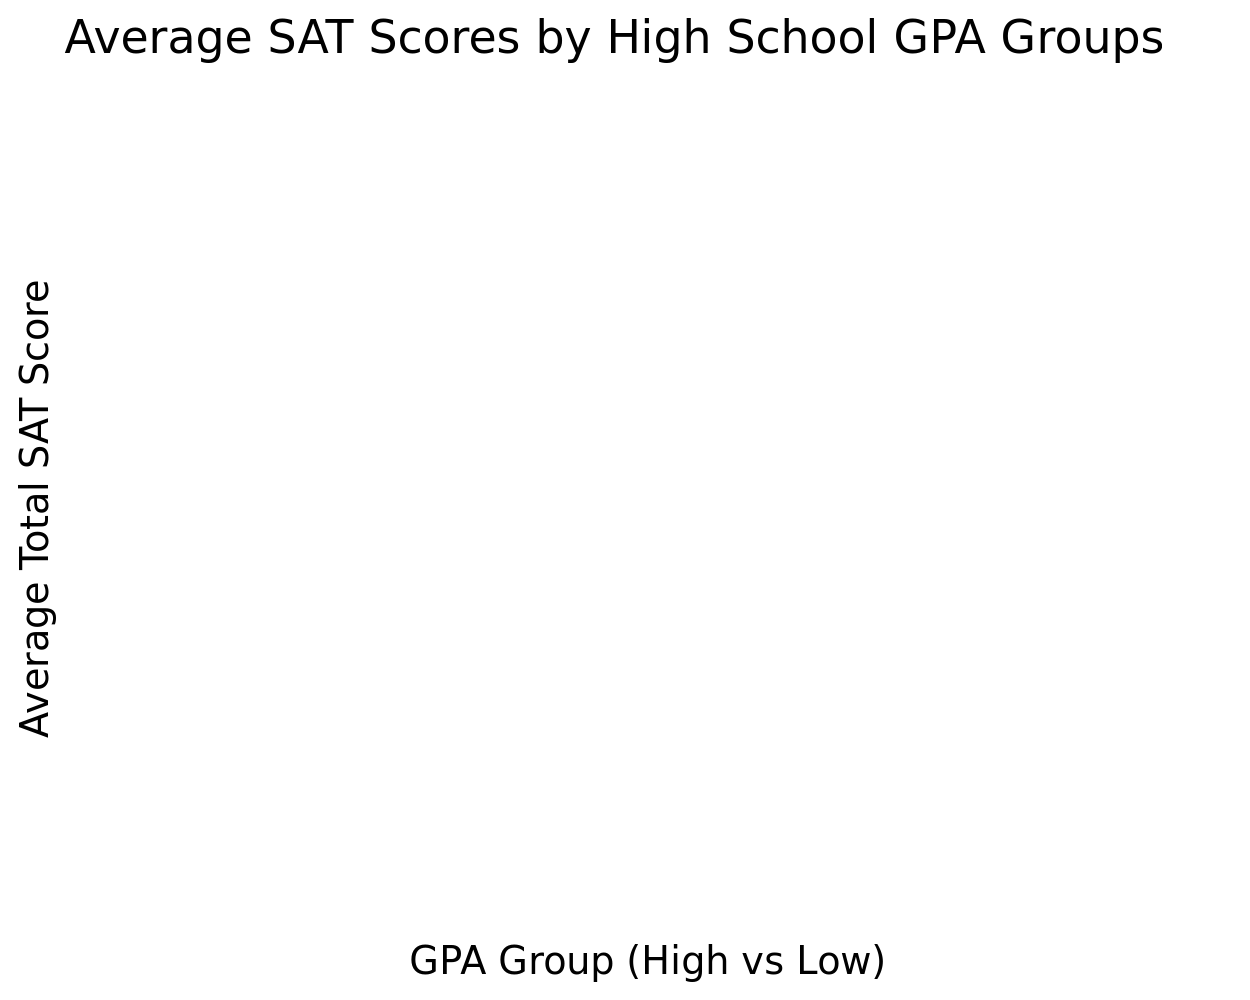

In [43]:
ggplot(avg_sat_gpa, aes(x = gpa_hs_group, y = avg_sat_total, fill = gpa_hs_group)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average SAT Scores by High School GPA Groups",
    x = "GPA Group (High vs Low)",
    y = "Average Total SAT Score"
  ) +
  scale_fill_manual(values = c("High GPA" = "green", "Low GPA" = "orange")) +
  theme_minimal()



## Stating a null hypothesis

## Q2.a)

State the null hypothesis that you are testing (using either words or
symbols)

**Answer:**

1.  There is a difference in total SAT scores between students with a "low" high-school GPA and those with a "high" high-school GPA.

Null Hypothesis

The null hypothes is 𝐻0 states that there is no difference in the population mean SAT scores between the two high-school GPA categories ("low" and "high"). In symbols:

    𝐻0 = μlow(GPA) = μhigh(GPA)
    


## Testing the hypothesis

## Q2.b)

Calculate the observed difference between the mean total SAT scores of
the low and high GPA high-school students.

In [45]:
# Ensure `gpa_hs_group` column is added to the dataset
sat_gpa <- sat_gpa %>%
  mutate(gpa_hs_group = ifelse(gpa_hs >= median(gpa_hs, na.rm = TRUE), "High GPA", "Low GPA"))

# Calculate mean SAT scores for each GPA group
mean_sat_by_gpa_group <- sat_gpa %>%
  group_by(gpa_hs_group) %>%
  summarize(mean_sat_total = mean(sat_total, na.rm = TRUE))

# Calculate the observed difference between High GPA and Low GPA groups
obs_diff_sat_total <- mean_sat_by_gpa_group %>%
  summarize(obs_diff = mean_sat_total[gpa_hs_group == "High GPA"] - mean_sat_total[gpa_hs_group == "Low GPA"])

obs_diff_sat_total


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


obs_diff
<dbl>


## Q2.c)

Generate the null distribution of $\delta$. Here you need to generate
simulated values *as if* we lived in a world where there’s no difference
in SAT scores between high school students with low and high GPAs.

In [47]:
# Ensure `gpa_hs_group` is a factor with two levels: "High GPA" and "Low GPA"
sat_gpa <- sat_gpa %>%
  mutate(
    gpa_hs_group = ifelse(gpa_hs >= median(gpa_hs, na.rm = TRUE), "High GPA", "Low GPA"),
    gpa_hs_group = factor(gpa_hs_group, levels = c("High GPA", "Low GPA"))
  )

# Generate the null distribution of differences in mean SAT scores
sat_null_distribution <- sat_gpa %>%
  specify(sat_total ~ gpa_hs_group) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 5000, type = "permute") %>%
  calculate(stat = "diff in means", order = c("High GPA", "Low GPA"))

# Display the first few rows of the null distribution
sat_null_distribution |> head()


Dropping unused factor levels c("High GPA", "Low GPA") from the supplied
explanatory variable 'gpa_hs_group'.


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [51]:
sat_gpa <- sat_gpa %>%
  filter(gpa_hs %in% c("low", "high"))

## Q2.d)

Calculate the differences in mean SAT scores between students with low
and high GPA scores under the Null. Note…you should use whatever order
you chose above…i.e. `order = c("low", "high")` or
`order = c("high", "low")`.

In [53]:
# Calculate the differences in mean SAT scores under the null hypothesis
gpa_diff_under_null <- sat_null_distribution %>%
  calculate(stat = "diff in means", order = c("High GPA", "Low GPA"))

# Display the first few rows of differences under the null
gpa_diff_under_null |> head()


ERROR: Error in eval(expr, envir, enclos): object 'sat_null_distribution' not found


## Q2.e)

Visualize how the observed difference compares to the null distribution
of $\delta$. Generate a histogram of the null distribution, with a
vertical red line showing the observed difference in SAT scores between
high school students with a high and low GPA.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_vline()`).”


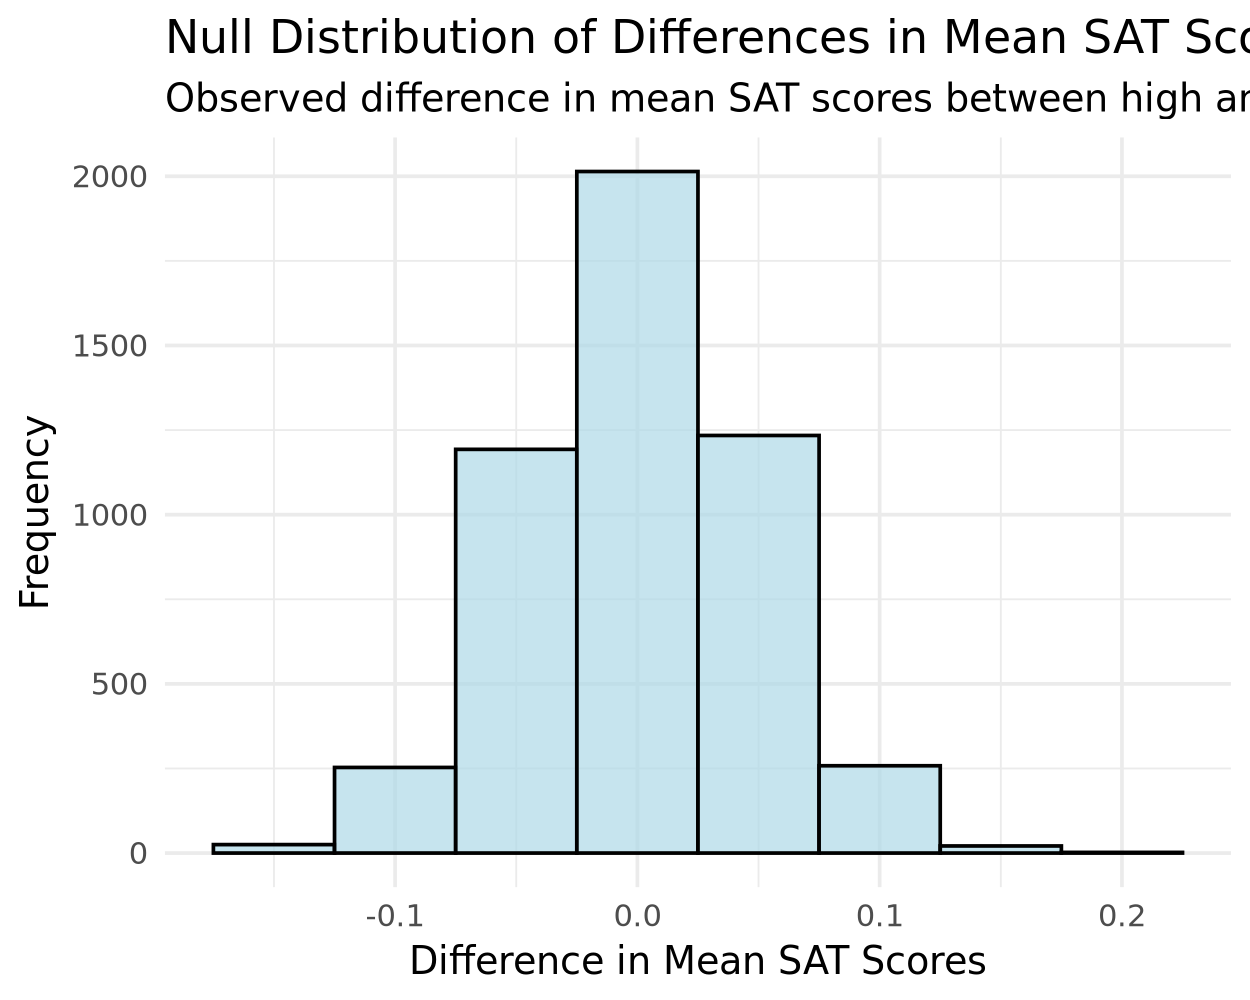

In [54]:
# you finish this code....

# sat_diff_under_null %>% 
# Step 1: Calculate the observed difference in mean SAT scores between high and low GPA groups
observed_diff <- sat_gpa %>%
  group_by(gpa_hs_group) %>%
  summarize(mean_sat_total = mean(sat_total, na.rm = TRUE)) %>%
  summarize(obs_diff = mean_sat_total[gpa_hs_group == "High GPA"] - mean_sat_total[gpa_hs_group == "Low GPA"]) %>%
  pull(obs_diff)

# Step 2: Plot the null distribution with the observed difference
gpa_diff_under_null %>%
  ggplot(aes(x = stat)) +
  geom_histogram(binwidth = 0.05, fill = "lightblue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = observed_diff, color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Null Distribution of Differences in Mean SAT Scores",
    subtitle = "Observed difference in mean SAT scores between high and low GPA groups (red line)",
    x = "Difference in Mean SAT Scores",
    y = "Frequency"
  ) +
  theme_minimal()


## Q2.f)

Calculate a p-value

In [56]:
# Remove NA values from the null distribution before calculating the p-value
gpa_diff_under_null_clean <- gpa_diff_under_null %>%
  filter(!is.na(stat))

# Calculate the p-value
p_value <- gpa_diff_under_null_clean %>%
  get_pvalue(obs_stat = observed_diff, direction = "both")

# Display the p-value
p_value


ERROR: Error in if (abs(pval) < 1e-16) {: missing value where TRUE/FALSE needed


## Q2.g)

Write up the results & conclusions for this hypothesis test. Note,
p-values less than 0.001 are often reported as p \< 0.001.


**Answer:**

1.  

## Q2.h)

Calculate a confidence interval for the difference in total SAT scores
for students with high and low high-school GPA scores. Note…you should
use whatever order you chose above…i.e. `order = c("low", "high")` or
`order = c("high", "low")`.

In [57]:
# you finish this code....

# ci_diff_sat_means <- sat_gpa %>% 
# Calculate a 95% confidence interval for the difference in SAT scores
ci_diff_sat_means <- sat_gpa %>% 
  specify(sat_total ~ gpa_hs_group) %>%
  generate(reps = 5000, type = "bootstrap") %>% 
  calculate(stat = "diff in means", order = c("High GPA", "Low GPA")) %>% 
  get_confidence_interval(level = 0.95)

# Display the confidence interval
ci_diff_sat_means


Dropping unused factor levels c("High GPA", "Low GPA") from the supplied
explanatory variable 'gpa_hs_group'.


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


## Q2.i)

Use a t-test to test the null hypothesis that total SAT scores do not
differ between students with high and low high school GPA scores at the
population level.

In [58]:

# Perform a t-test to compare total SAT scores between high and low GPA groups
t_test_results <- t.test(sat_total ~ gpa_hs_group, data = sat_gpa)

# Display the results of the t-test
t_test_results



ERROR: Error in t.test.formula(sat_total ~ gpa_hs_group, data = sat_gpa): grouping factor must have exactly 2 levels
